In [119]:
# Import base librares
import pandas as pd
import numpy as np
import os
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [145]:
def kaggle_submit(file, comment):
#     print(file, comment)
    !echo File name={file}
    !ls -l {file}
    !echo kaggle competitions submit -c competitive-data-science-final-project -f {file} -m '"{comment}"' 
    !kaggle competitions submit -c competitive-data-science-final-project -f {file} -m "{comment}"

def kaggle_get_submissions():
    !kaggle competitions submissions competitive-data-science-final-project

In [120]:
# Download data files
data_folder = Path('../readonly/final_project_data')

transactions    = pd.read_csv(data_folder/'sales_train.csv.gz')
items           = pd.read_csv(data_folder/'items.csv')
item_categories = pd.read_csv(data_folder/'item_categories.csv')
shops           = pd.read_csv(data_folder/'shops.csv')

test = pd.read_csv(data_folder/'test.csv.gz', index_col='ID')

In [121]:
# Base data observation
print('Transactions shape:', transactions.shape)
transactions.head()

Transactions shape: (2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [122]:
print('items shape:', items.shape)
items.head()

items shape: (22170, 3)


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [123]:
print('item_categories shape:', item_categories.shape)
item_categories.head()

item_categories shape: (84, 2)


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [124]:
print('shops shape:', shops.shape)
shops.head()

shops shape: (60, 2)


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [125]:
print(test.info())
print('Test date shape:', shops.shape)
test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214200 entries, 0 to 214199
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   shop_id  214200 non-null  int64
 1   item_id  214200 non-null  int64
dtypes: int64(2)
memory usage: 4.9 MB
None
Test date shape: (60, 2)


,shop_id,item_id
ID,,
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268


In [152]:
# Merge into one table
transactions.date = pd.to_datetime(transactions.date, yearfirst=True)
data = transactions.merge(items).merge(item_categories).merge(shops)
# Calculate income from transaction
# data['income'] = data['item_price'] * data['item_cnt_day']
# Number of months since year 2013
# data['mdate'] = ((data['date'].dt.year-2013)*12)+data['date'].dt.month
# Add year, month and day rows
# data['year'] = data['date'].dt.year
# data['month'] = data['date'].dt.month
# data['day'] = data['date'].dt.day
data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,2013-02-01,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,2013-04-26,3,59,944,150.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
2,2013-06-26,5,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
3,2013-07-20,6,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
4,2013-09-14,8,59,944,299.0,2.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-22,33,55,13093,250.0,1.0,Карта оплаты Windows: 250 рублей [Цифровая вер...,36,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн
2935845,2015-09-21,32,55,13091,1000.0,1.0,Карта оплаты Windows: 1000 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн
2935846,2015-09-16,32,55,13094,2500.0,1.0,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн
2935847,2015-09-22,32,55,13094,2500.0,2.0,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра),Цифровой склад 1С-Онлайн


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      int64         
 2   shop_id             int64         
 3   item_id             int64         
 4   item_price          float64       
 5   item_cnt_day        float64       
 6   item_name           object        
 7   item_category_id    int64         
 8   item_category_name  object        
 9   shop_name           object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 246.4+ MB


CPU times: user 77.3 ms, sys: 1.13 ms, total: 78.4 ms
Wall time: 77.5 ms


count    31531.000000
mean         2.253528
std         14.533295
min         -1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       2253.000000
Name: item_cnt_day, dtype: float64

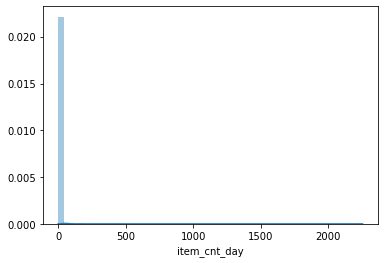

In [155]:
%%time
# Calc normalized monthly sum of sales in each shop/item
d_sum = data[data['date_block_num']==33].groupby(['shop_id', 'item_id'])['item_cnt_day'].sum()
# d_sum[d_sum<0]=0
sns.distplot(d_sum)
d_sum.describe()

In [156]:
d_sum_norm = (d_sum-d_sum.min())/(d_sum.max()-d_sum.min())*20
d_sum_norm.describe()

count    31531.000000
mean         0.028869
std          0.128956
min          0.000000
25%          0.017746
50%          0.017746
75%          0.026619
max         20.000000
Name: item_cnt_day, dtype: float64

In [157]:
# Make the fiture - previous_value_benchmark as 
d_sum_idx = pd.MultiIndex.from_product([np.arange(data['shop_id'].max()+1)
                                        , np.arange(data['item_id'].max()+1)])
d_sum_indexed = pd.DataFrame(index=d_sum_idx, data=d_sum_norm)
# d_sum_indexed = d_sum_indexed.shift(periods=-1)
d_sum_indexed.fillna(value=0, inplace=True)
d_sum_indexed.reset_index(inplace=True)
d_sum_indexed.columns=['shop_id', 'item_id', 'item_cnt_month']
d_sum_indexed

,shop_id,item_id,item_cnt_month
0,0,0,0.0
1,0,1,0.0
2,0,2,0.0
3,0,3,0.0
4,0,4,0.0
...,...,...,...
1330195,59,22165,0.0
1330196,59,22166,0.0
1330197,59,22167,0.0
1330198,59,22168,0.0


In [158]:
submission = test.merge(d_sum_indexed, how='left', sort=False)
submission.index.name='ID'
submission.drop(columns=['shop_id', 'item_id']).to_csv('submission.csv', index=True)
# submission.to_csv('submission.csv', index=True)
!ls -l submission.csv
!head submission.csv
!head
# submission

-rw-r--r-- 1 jovyan users 2707355 Aug  8 22:01 submission.csv
ID,item_cnt_month
0,0.0
1,0.0
2,0.01774622892635315
3,0.0
4,0.0
5,0.01774622892635315
6,0.026619343389529725
7,0.0
8,0.0
^C


In [159]:
# kaggle_submit("submission.csv", "fixed previous_value_benchmark possibly")

File name=submission.csv
-rw-r--r-- 1 jovyan users 2707355 Aug  8 22:01 submission.csv
kaggle competitions submit -c competitive-data-science-final-project -f submission.csv -m "fixed previous_value_benchmark possibly"
100%|███████████████████████████████████████| 2.58M/2.58M [00:04<00:00, 611kB/s]
Successfully submitted to Final project: predict future sales

In [160]:
kaggle_get_submissions()

fileName        date                 description                                status    publicScore  privateScore  
--------------  -------------------  -----------------------------------------  --------  -----------  ------------  
submission.csv  2020-08-08 22:02:13  fixed previous_value_benchmark possibly    complete  1.23842      1.22799       
submission.csv  2020-08-08 21:48:45  fixed previous_value_benchmark possibly    complete  1.24045      1.22959       
submission.csv  2020-08-08 21:34:29  "fixed previous_value_benchmark possibly"  complete  1.23861      1.22771       
submission.csv  2020-08-08 15:13:39  test comment                               complete  1.24045      1.22959       
submission.csv  2020-08-08 14:53:20  Test kaggle submit                         complete  1.24045      1.22959       
submission.csv  2020-08-08 14:42:26  previous_value_benchmark fixed             complete  1.24045      1.22959       
submission.csv  2020-08-08 14:20:48  previous_value_benc

In [162]:
%%time
# Remove outliers from data
data[data['item_cnt_day']<0] = 0
data[data['item_cnt_day']>20] = 20

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


,item_cnt_day
count,31519.000000
mean,1.096489
std,0.535323
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,17.000000


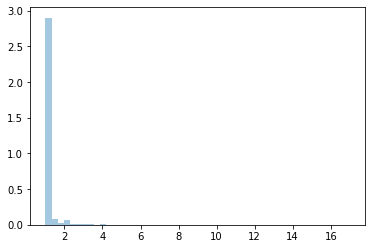

In [171]:
d_sum_mean = data[data['date_block_num']==33].groupby(['shop_id', 'item_id'])['item_cnt_day'].mean().to_frame()
# d_sum[d_sum<0]=0
sns.distplot(d_sum_mean)
d_sum_mean.describe()

,shop_id,item_id,item_cnt_month
0,2,31,1.0
1,2,486,1.0
2,2,787,1.0
3,2,794,1.0
4,2,968,1.0
...,...,...,...
31514,59,22087,2.0
31515,59,22088,1.0
31516,59,22091,1.0
31517,59,22100,1.0


In [177]:
d_sum_mean.reset_index(inplace=True)
d_sum_mean.columns=['shop_id', 'item_id', 'item_cnt_month']

submission = test.merge(d_sum_mean, how='left', sort=False)
submission.index.name='ID'
submission.fillna(0, inplace=True)
submission

,shop_id,item_id,item_cnt_month
ID,,,
0,5,5037,0.0
1,5,5320,0.0
2,5,5233,1.0
3,5,5232,0.0
4,5,5268,0.0
...,...,...,...
214195,45,18454,1.0
214196,45,16188,0.0
214197,45,15757,0.0


In [178]:
submission.drop(columns=['shop_id', 'item_id']).to_csv('previous_value_benchmark.csv', index=True)
# kaggle_submit("previous_value_benchmark.csv", "Calc previous_value_benchmark possibly as a mean value")

File name=previous_value_benchmark.csv
-rw-r--r-- 1 jovyan users 2257097 Aug  9 08:07 previous_value_benchmark.csv
kaggle competitions submit -c competitive-data-science-final-project -f previous_value_benchmark.csv -m "Calc previous_value_benchmark possibly as a mean value"
100%|███████████████████████████████████████| 2.15M/2.15M [00:03<00:00, 702kB/s]
Successfully submitted to Final project: predict future sales

In [179]:
kaggle_get_submissions()

fileName                      date                 description                                             status    publicScore  privateScore  
----------------------------  -------------------  ------------------------------------------------------  --------  -----------  ------------  
previous_value_benchmark.csv  2020-08-09 08:07:44  Calc previous_value_benchmark possibly as a mean value  complete  1.16489      1.15466       
previous_value_benchmark.csv  2020-08-09 07:47:50  Discovering hypotyses                                   complete  1.40624      1.39783       
submission.csv                2020-08-08 22:02:13  fixed previous_value_benchmark possibly                 complete  1.23842      1.22799       
submission.csv                2020-08-08 21:48:45  fixed previous_value_benchmark possibly                 complete  1.24045      1.22959       
submission.csv                2020-08-08 21:34:29  "fixed previous_value_benchmark possibly"               complete  1.23861      

Seems that needs by course